In [ ]:
¢from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Thesis_XAI/XAI


Mounted at /content/drive
/content/drive/MyDrive/Thesis_XAI/XAI


In [ ]:
import sys
print(sys.version)


3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
!pip uninstall -y tensorflow tensorflow-text tf-keras jax tensorstore ml-dtypes protobuf
!pip install "tensorflow==2.14.0" "numpy<2.0" "ml-dtypes==0.2.0" protobuf==4.25.3 --quiet --no-cache-dir
!pip install dl-backtrace graphviz lime shap --quiet
!pip install numpy==1.24.3 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.3.2 scipy==1.10.1

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: tensorstore 0.1.74
Uninstalling tensorstore-0.1.74:
  Successfully uninstalled tensorstore-0.1.74
Found existing installation: ml-dtypes 0.4.1
Uninstalling ml-dtypes-0.4.1:
  Successfully uninstalled ml-dtypes-0.4.1
Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 91.2 MB/s eta 0:0

In [ ]:
!pip install xai_evals

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found exist

In [ ]:
!pip install dl-backtrace==0.0.19 --quiet --no-cache-dir


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
from xai_evals.metrics import ExplanationMetricsTabular

In [ ]:
import shap
import numpy as np
import pandas as pd
import shap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import json
import sys, os, importlib
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.base import clone
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr


# Importing Datasets

## Breast Cancer Wisonsin

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

for file in os.listdir(path):
    print(file)

df_wisconsin = pd.read_csv(os.path.join(path, "data.csv"))

# Changing outcome variabel to 1/0 for malignant/benign
df_wisconsin["diagnosis"] = df_wisconsin["diagnosis"].map({"M": 1, "B": 0})

df_wisconsin = df_wisconsin.drop(columns=["id", "Unnamed: 32"])

print(df_wisconsin.isnull().values.any())
df_wisconsin.shape

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data
data.csv
False


(569, 31)

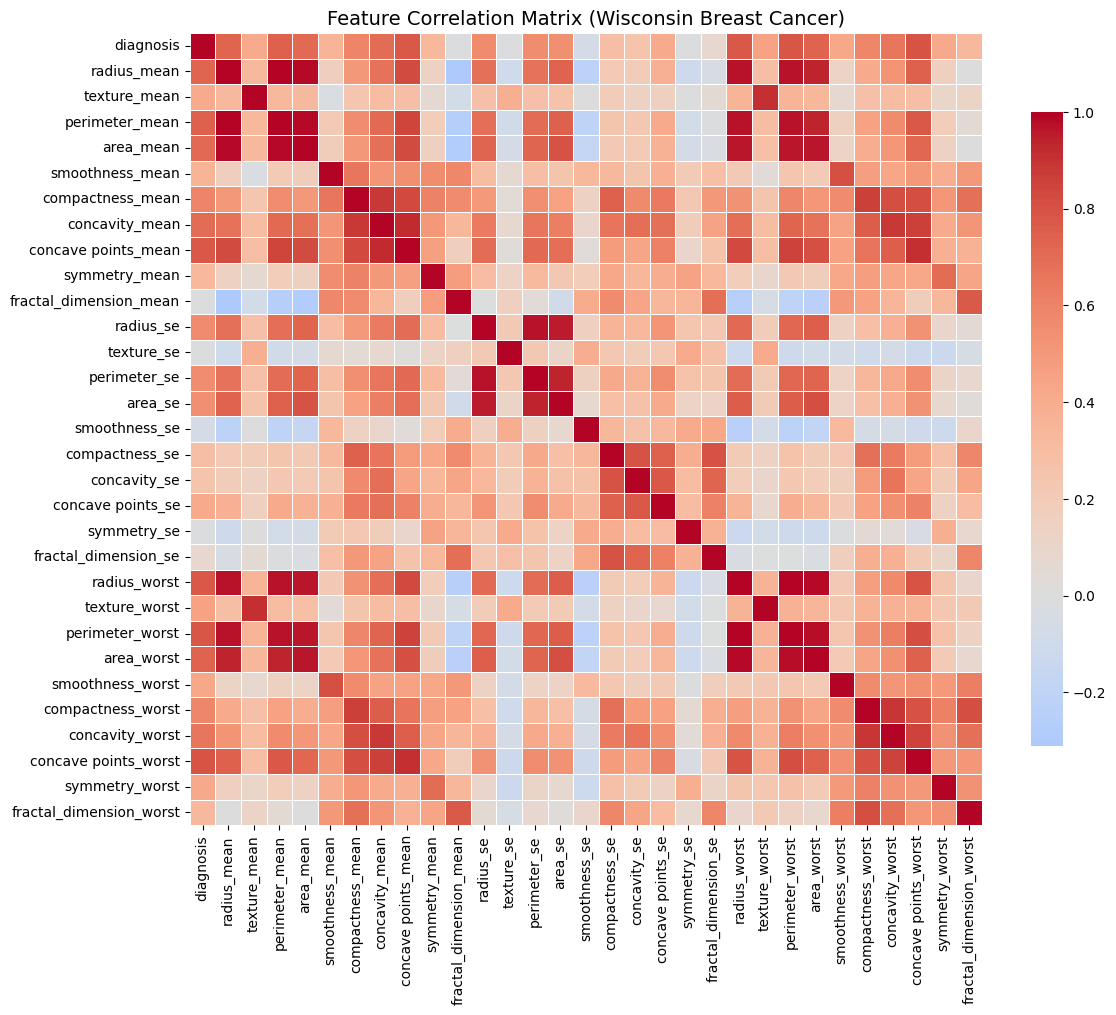

In [ ]:
# Compute correlation matrix
corr = df_wisconsin.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Matrix (Wisconsin Breast Cancer)", fontsize=14)
plt.tight_layout()
plt.show()


## Pima Indians Diebetes

In [ ]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

for file in os.listdir(path):
    print(file)

df_pima = pd.read_csv(os.path.join(path, "diabetes.csv"))

# Replace biologically impossible zeros with NaN
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_pima[invalid_zero_cols] = df_pima[invalid_zero_cols].replace(0, np.nan)

# Replace NaNs with column medians
df_pima = df_pima.fillna(df_pima.median(numeric_only=True))

print(df_pima.isnull().values.any())  # should print False
df_pima.shape


diabetes.csv
False


(768, 9)

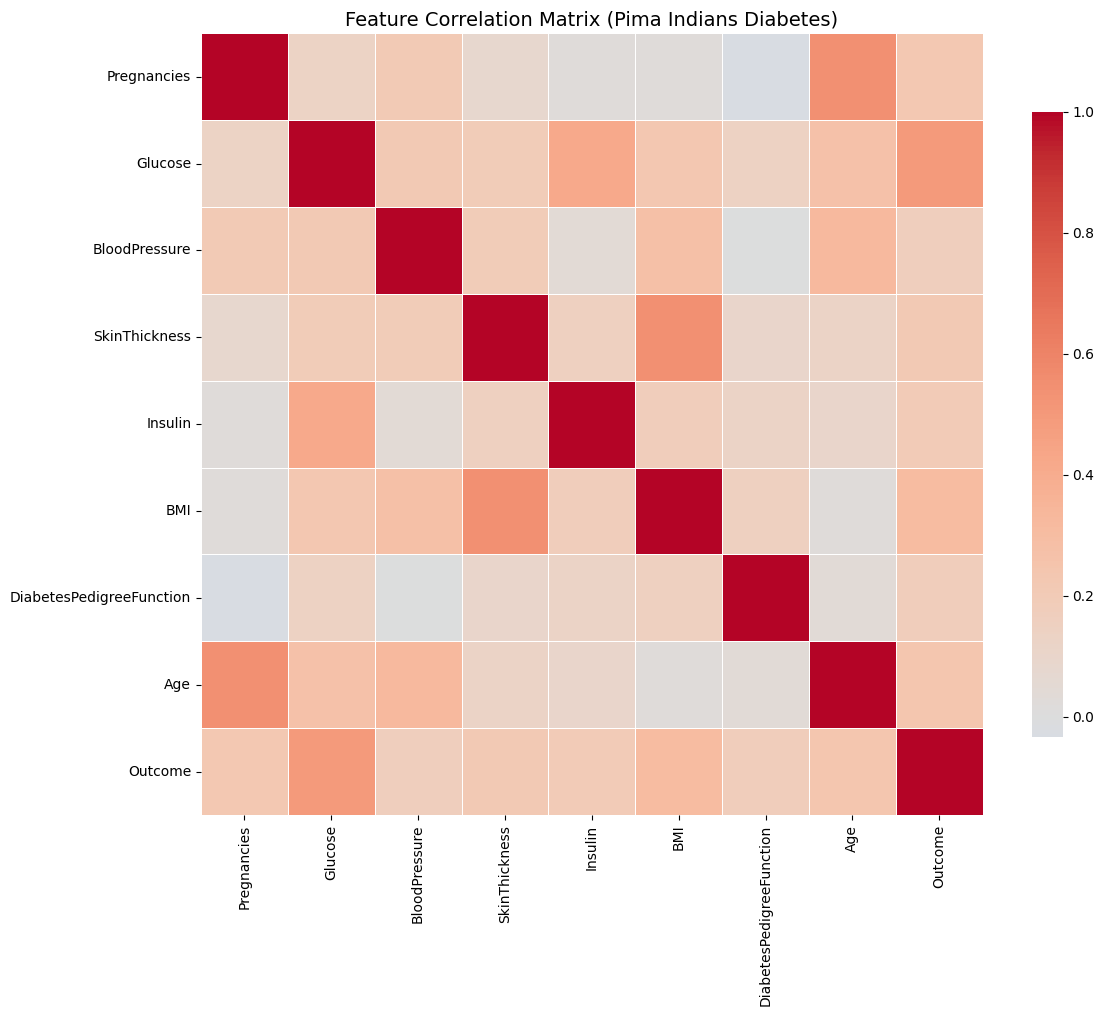

In [ ]:
# Compute correlation matrix
corr = df_pima.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Matrix (Pima Indians Diabetes)", fontsize=14)
plt.tight_layout()
plt.show()


## Banknote Authentication

In [ ]:
path = kagglehub.dataset_download("ritesaluja/bank-note-authentication-uci-data")

for file in os.listdir(path):
    print(file)

df_bankn = pd.read_csv(os.path.join(path, "BankNote_Authentication.csv"))

print(df_bankn.isnull().values.any())
df_bankn.shape


BankNote_Authentication.csv
False


(1372, 5)

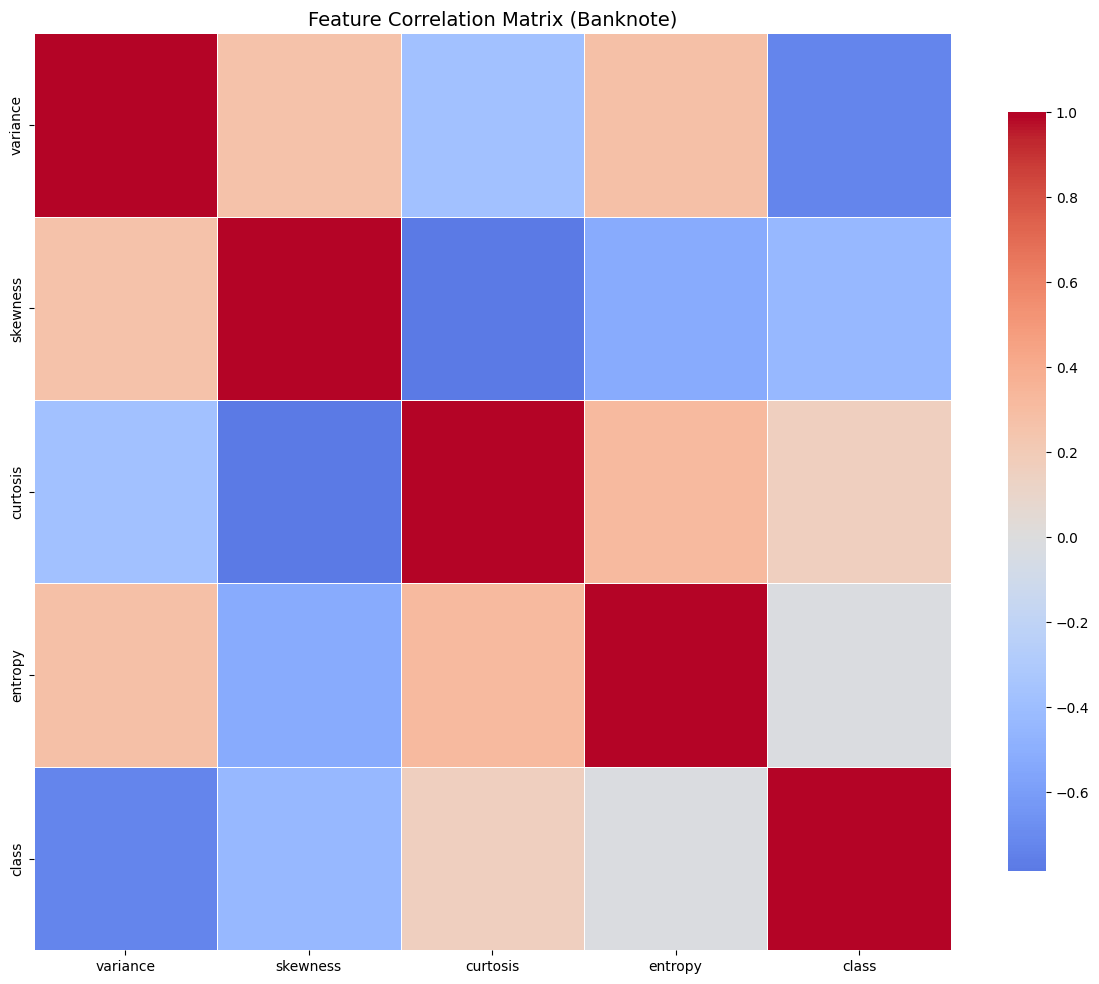

In [ ]:
# Compute correlation matrix
corr = df_bankn.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Matrix (Banknote)", fontsize=14)
plt.tight_layout()
plt.show()


# Making the datasets ready

In [ ]:
### BREASTCANCER IN WISCONSIN ###
# Dropping "Unnamed" column and target column
X_wisconsin = df_wisconsin.drop(columns=["diagnosis"])
# Extracting target column
y_wisconsin = df_wisconsin["diagnosis"]




### PIMA INDIANS DIABETES ###
# Dropping target
X_pima = df_pima.drop(columns=["Outcome"])
# extracting target
y_pima = df_pima["Outcome"]




### BANKNOTE AUTHENTICATION ###
X_bankn = df_bankn.drop(columns=["class"])
y_bankn = df_bankn["class"]




# Splitting Datasets into Train/Test

In [ ]:
RANDOM_STATE = 42

# Wisconsin
X_wis_train, X_wis_test, y_wis_train, y_wis_test = train_test_split(
    X_wisconsin, y_wisconsin, test_size=0.20, stratify=y_wisconsin, random_state=RANDOM_STATE
)

# Pima
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(
    X_pima, y_pima, test_size=0.20, stratify=y_pima, random_state=RANDOM_STATE
)

# Banknote
X_bankn_train, X_bankn_test, y_bankn_train, y_bankn_test = train_test_split(
    X_bankn, y_bankn, test_size=0.20, stratify=y_bankn, random_state=RANDOM_STATE
)



# Dropping Overly Correlated Features

In [ ]:
def correlated_features_to_drop(X_train, threshold=0.7):
    corr = X_train.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if (upper[col] > threshold).any()]
    return to_drop

THRESH = 0.7

In [ ]:
def average_absolute_correlation(X: pd.DataFrame) -> float:
    corr = X.corr().abs().values
    upper = corr[np.triu_indices_from(corr, k=1)]
    return float(np.mean(upper))

## Wisconsin

In [ ]:
# baseline
X_wis_train_corr = X_wis_train.copy()
X_wis_test_corr  = X_wis_test.copy()

# reduced correlation
wis_drop = correlated_features_to_drop(X_wis_train, threshold=THRESH)

X_wis_train_red = X_wis_train.drop(columns=wis_drop)
X_wis_test_red  = X_wis_test.drop(columns=wis_drop)

print("Wisconsin dropped:", len(wis_drop))


Wisconsin dropped: 21


In [ ]:
wis_avg_corr_base = average_absolute_correlation(X_wis_train_corr)
wis_avg_corr_red  = average_absolute_correlation(X_wis_train_red)

print("Wisconsin:")
print("  baseline:", wis_avg_corr_base)
print("  reduced :", wis_avg_corr_red)



Wisconsin:
  baseline: 0.39655057702018226
  reduced : 0.27519015183839873


## Pima

In [ ]:
X_pima_train_corr = X_pima_train.copy()
X_pima_test_corr  = X_pima_test.copy()

pima_drop = correlated_features_to_drop(X_pima_train, threshold=THRESH)

X_pima_train_red = X_pima_train.drop(columns=pima_drop)
X_pima_test_red  = X_pima_test.drop(columns=pima_drop)

print("Pima dropped:", len(pima_drop))


Pima dropped: 0


## Banknote

In [ ]:
X_bankn_train_corr = X_bankn_train.copy()
X_bankn_test_corr  = X_bankn_test.copy()

bankn_drop = correlated_features_to_drop(X_bankn_train, threshold=THRESH)

X_bankn_train_red = X_bankn_train.drop(columns=bankn_drop)
X_bankn_test_red  = X_bankn_test.drop(columns=bankn_drop)

print("Banknote dropped:", len(bankn_drop))


Banknote dropped: 1


## Creating Dict for Datasets

In [ ]:
datasets = {
    "wisconsin": {
        "corr": {"X_train": X_wis_train_corr, "X_test": X_wis_test_corr, "y_train": y_wis_train, "y_test": y_wis_test},
        "red":  {"X_train": X_wis_train_red,  "X_test": X_wis_test_red,  "y_train": y_wis_train, "y_test": y_wis_test},
        "dropped": wis_drop,
    },
    "pima": {
        "corr": {"X_train": X_pima_train_corr, "X_test": X_pima_test_corr, "y_train": y_pima_train, "y_test": y_pima_test},
        "red":  {"X_train": X_pima_train_red,  "X_test": X_pima_test_red,  "y_train": y_pima_train, "y_test": y_pima_test},
        "dropped": pima_drop,
    },
    "banknote": {
        "corr": {"X_train": X_bankn_train_corr, "X_test": X_bankn_test_corr, "y_train": y_bankn_train, "y_test": y_bankn_test},
        "red":  {"X_train": X_bankn_train_red,  "X_test": X_bankn_test_red,  "y_train": y_bankn_train, "y_test": y_bankn_test},
        "dropped": bankn_drop,
    },
}


# Define Models

In [ ]:
MODEL_RANDOM_STATE = 20


# Base Logistic Regression model
base_lm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=2000,
        random_state=MODEL_RANDOM_STATE))
])

# Base Random Forest model
base_rf = Pipeline([
    ("model", RandomForestClassifier(
        n_estimators=500,
        random_state=MODEL_RANDOM_STATE))
])

# Base Gradient Boosting model
base_gb = Pipeline([
    ("model", GradientBoostingClassifier(
        n_estimators=500,
        random_state=MODEL_RANDOM_STATE))
])

# Base MLP model
base_nn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", MLPClassifier(
        hidden_layer_sizes=(16,),
        solver="adam",
        alpha=1e-4, learning_rate_init=1e-3,
        max_iter=2000, early_stopping=True,
        n_iter_no_change=20,
        random_state=MODEL_RANDOM_STATE
    ))
])



# Instances to Explain

In [ ]:
def stratified_indices(y, per_class=10, s=None):
    '''Function for finding X instances per class'''
    y = y.ravel()
    idxs = [] # Empty list for storing indexes of instances from each class
    for c in np.unique(y): # Loop over each unique class
        cls_idx = np.where(y == c)[0] # Get indicies all all instances belonging to c
        chosen = s.choice(cls_idx, size=per_class, replace=False) # Randomly choose per_class indicies from the class index
        idxs.append(chosen) # append the chosen classes to the list of instances chosen
    idxs = np.concatenate(idxs) # concatenate the list of array into one list
    s.shuffle(idxs) # Shuffle instances
    return idxs

In [ ]:
INSTANCES_PER_CLASS = 40

test_idx = {
    "wisconsin": stratified_indices(
        y_wis_test.values,
        per_class=INSTANCES_PER_CLASS,
        s=np.random.default_rng(123)
    ),
    "pima": stratified_indices(
        y_pima_test.values,
        per_class=INSTANCES_PER_CLASS,
        s=np.random.default_rng(123)
    ),
    "banknote": stratified_indices(
        y_bankn_test.values,
        per_class=INSTANCES_PER_CLASS,
        s=np.random.default_rng(123)
    ),
}


# Fitting Models

In [ ]:
# Put models in a dict for looping
models = {
    "lm": base_lm,
    "rf": base_rf,
    "gb": base_gb,
    "nn": base_nn,
}

rows = []
models_store = {}
models_performance = {}

for dataset_name, ds in datasets.items():
    for model_name, model in models.items():
        for condition_name in ["corr", "red"]:

            X_train_use = ds[condition_name]["X_train"]
            y_train_use = ds[condition_name]["y_train"]
            X_test_use  = ds[condition_name]["X_test"]
            y_test_use  = ds[condition_name]["y_test"]

            # Fit
            fitted = clone(model)
            fitted.fit(X_train_use, y_train_use)

            # Evaluate
            preds = fitted.predict(X_test_use)
            acc = accuracy_score(y_test_use, preds)
            f1_pos = f1_score(y_test_use, preds, average="binary", pos_label=1)

            proba = fitted.predict_proba(X_test_use)
            y_score = proba[:, 1]

            ap = average_precision_score(y_test_use, y_score)
            roc = roc_auc_score(y_test_use, y_score)

            confidences = np.max(proba, axis=1)

            y_true = np.asarray(y_test_use)
            correct = (preds == y_true)

            mean_confidence = float(np.mean(confidences))
            mean_confidence_correct = float(np.mean(confidences[correct])) if np.any(correct) else np.nan
            mean_confidence_wrong   = float(np.mean(confidences[~correct])) if np.any(~correct) else np.nan

            rows.append({
                "model": model_name,
                "dataset": dataset_name,
                "condition": condition_name,
                "n_train": len(X_train_use),
                "n_features": X_train_use.shape[1],
                "accuracy": acc,
                "f1_pos": f1_pos,
                "ap": ap,
                "roc_auc": roc,
                "mean_confidence": mean_confidence,
                "mean_confidence_correct": mean_confidence_correct,
                "mean_confidence_wrong": mean_confidence_wrong,
            })

            key = (dataset_name, model_name, condition_name)
            models_store[key] = fitted
            models_performance[key] = {
                "n_train": len(X_train_use),
                "n_features": X_train_use.shape[1],
                "accuracy": acc,
                "f1_pos": f1_pos,
                "ap": ap,
                "roc_auc": roc,
                "mean_confidence": mean_confidence,
                "mean_confidence_correct": mean_confidence_correct,
                "mean_confidence_wrong": mean_confidence_wrong,
            }

results = (
    pd.DataFrame(rows)
      .sort_values(["dataset", "model", "condition"])
      .reset_index(drop=True)
)

results


,model,dataset,condition,n_train,n_features,accuracy,f1_pos,ap,roc_auc,mean_confidence,mean_confidence_correct,mean_confidence_wrong
0,gb,banknote,corr,1097,4,0.996364,0.995918,1.000000,1.000000,0.999996,0.999997,0.999831
1,gb,banknote,red,1097,3,0.974545,0.971888,0.997586,0.998071,0.986546,0.991403,0.800585
2,lm,banknote,corr,1097,4,0.970909,0.968254,0.999933,0.999946,0.967519,0.977167,0.645529
3,lm,banknote,red,1097,3,0.880000,0.865306,0.955244,0.959391,0.894700,0.917519,0.727361
4,nn,banknote,corr,1097,4,0.927273,0.921875,0.989844,0.991428,0.769014,0.785673,0.556616
5,nn,banknote,red,1097,3,0.880000,0.861925,0.954317,0.962874,0.715986,0.733751,0.585714
6,rf,banknote,corr,1097,4,0.996364,0.995918,1.000000,1.000000,0.981680,0.982869,0.656000
7,rf,banknote,red,1097,3,0.985455,0.983740,0.997648,0.998179,0.948000,0.951137,0.735500
8,gb,pima,corr,614,8,0.727273,0.611111,0.686940,0.810185,0.907783,0.940206,0.821321
9,gb,pima,red,614,8,0.727273,0.611111,0.686940,0.810185,0.907783,0.940206,0.821321


In [ ]:
results.pivot_table(
    index=["dataset", "model"],
    columns="condition",
    values=["accuracy", "roc_auc"],
)


accuracy             roc_auc          
condition            corr       red      corr       red
dataset   model                                        
banknote  gb     0.996364  0.974545  1.000000  0.998071
          lm     0.970909  0.880000  0.999946  0.959391
          nn     0.927273  0.880000  0.991428  0.962874
          rf     0.996364  0.985455  1.000000  0.998179
pima      gb     0.727273  0.727273  0.810185  0.810185
          lm     0.707792  0.707792  0.812963  0.812963
          nn     0.681818  0.681818  0.577593  0.577593
          rf     0.727273  0.727273  0.814259  0.814259
wisconsin gb     0.964912  0.903509  0.997685  0.961971
          lm     0.964912  0.903509  0.996032  0.977183
          nn     0.991228  0.763158  0.999669  0.927579
          rf     0.964912  0.912281  0.994048  0.978505

In [ ]:
for name, ds in datasets.items():
    print(name, "dropped:", len(ds["dropped"]))


wisconsin dropped: 21
pima dropped: 0
banknote dropped: 1


In [ ]:
for name, ds in datasets.items():
    n_corr = ds["corr"]["X_train"].shape[1]
    n_red  = ds["red"]["X_train"].shape[1]
    print(name, "features corr/red:", n_corr, "/", n_red)


wisconsin features corr/red: 30 / 9
pima features corr/red: 8 / 8
banknote features corr/red: 4 / 3


# Computing Metrics

In [ ]:
import warnings, contextlib, os, pickle
import numpy as np
import shap

metrics = {}
filenames = []

method = "lime"
dataset_name = "wisconsin"
idx = test_idx[dataset_name]  # same indices for corr and red

CORE_METRICS = ["faithfulness", "infidelity", "sensitivity", "comprehensiveness"]

for condition_name in ["corr", "red"]:
    d = datasets[dataset_name][condition_name]

    X_test_sub = d["X_test"].iloc[idx]
    y_test_sub = d["y_test"].iloc[idx]
    feature_names = list(X_test_sub.columns)

    # background from THIS condition's training set
    X_bg = shap.sample(d["X_train"], 200, random_state=123)

    for model_name in ["lm", "rf", "gb", "nn"]:
        print("Running metrics for:", dataset_name, condition_name, model_name)

        model = models_store[(dataset_name, model_name, condition_name)]


        em = ExplanationMetricsTabular(
            model=model,
            explainer_name=method,
            X_train=X_bg.values,
            X_test=X_test_sub.values,
            y_test=y_test_sub.values,
            features=feature_names,
            task="binary-classification",
            metrics = CORE_METRICS
        )

        with warnings.catch_warnings():
            with open(os.devnull, "w") as devnull, \
                 contextlib.redirect_stdout(devnull), \
                 contextlib.redirect_stderr(devnull):
                result = em.calculate_metrics()

        key = (dataset_name, model_name, condition_name, method)
        metrics[key] = result
        del em

        filename = f"{dataset_name}_{model_name}_{condition_name}_metrics_{method}.pkl"
        with open(filename, "wb") as f:
            pickle.dump({key: result}, f)

        filenames.append(filename)

filenames


'import warnings, contextlib, os, pickle\nimport numpy as np\nimport shap\n\nmetrics = {}\nfilenames = []\n\nmethod = "lime"\ndataset_name = "wisconsin"\nidx = test_idx[dataset_name]  # same indices for corr and red\n\nCORE_METRICS = ["faithfulness", "infidelity", "sensitivity", "comprehensiveness"]\n\nfor condition_name in ["corr", "red"]:\n    d = datasets[dataset_name][condition_name]\n\n    X_test_sub = d["X_test"].iloc[idx]\n    y_test_sub = d["y_test"].iloc[idx]\n    feature_names = list(X_test_sub.columns)\n\n    # background from THIS condition\'s training set (dims differ)\n    X_bg = shap.sample(d["X_train"], 200, random_state=123)\n\n    for model_name in ["lm", "rf", "gb", "nn"]:\n        print("Running metrics for:", dataset_name, condition_name, model_name)\n\n        # FIXED KEY ORDER HERE:\n        model = models_store[(dataset_name, model_name, condition_name)]\n\n\n        em = ExplanationMetricsTabular(\n            model=model,\n            explainer_name=method,\n 

# De-looped version for SHAP

In [ ]:
import warnings, contextlib, os, pickle
import numpy as np
import shap

### CHANGE STUFF HERE ###

dataset = "wisconsin"
condition = "red"
method = "shap"
model_name = "nn"

BACKGROUND_SIZE = 200

CORE_METRICS = ["faithfulness", "infidelity", "sensitivity", "comprehensiveness"]

##########################

# Grab the split for this condition
d = datasets[dataset][condition]

X_train_initial = d["X_train"]
y_train_initial = d["y_train"]
X_test = d["X_test"]
y_test = d["y_test"]

idx = test_idx[dataset]

X_test_sub = X_test.iloc[idx]
y_test_sub = y_test.iloc[idx]

feature_names = list(X_test_sub.columns)

key = (dataset, model_name, condition)
print("Running metrics for:", key, "| method:", method)

model = models_store[key]

# Background from THIS condition's training set
X_bg = shap.sample(X_train_initial, BACKGROUND_SIZE, random_state=123)

em = ExplanationMetricsTabular(
    model=model,
    explainer_name=method,
    X_train=X_bg.values,
    X_test=X_test_sub.values,
    y_test=y_test_sub.values,
    features=feature_names,
    task="binary-classification",
    metrics=CORE_METRICS
)

with warnings.catch_warnings():
    with open(os.devnull, "w") as devnull, \
         contextlib.redirect_stdout(devnull), \
         contextlib.redirect_stderr(devnull):
        result = em.calculate_metrics()

metrics = {}
metrics[(dataset, model_name, condition, method)] = result
del em

filename = f"{dataset}_{model_name}_{condition}_metrics_{method}.pkl"
with open(filename, "wb") as f:
    pickle.dump(metrics, f)

print("Saved:", filename)


  0%|          | 0/1 [00:00<?, ?it/s]

Running metrics for: ('wisconsin', 'nn', 'red') | method: shap


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Saved: wisconsin_nn_red_metrics_shap.pkl


In [ ]:
filename = f"{dataset}_{model_name}_metrics_{method}_{condition}.pkl"
with open(filename, "wb") as f:
    pickle.dump(metrics, f)

print("Saved:", filename)

Saved: wisconsin_nn_metrics_shap_red.pkl


In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>